In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib import cm
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
target_job_schedule_types = ['Full-time', 'Contractor']

df_filtered = df[df['job_title_short'].isin(target_job_titles)]
df_filtered = df_filtered[df_filtered['job_country'] == 'United States']
df_filtered = df_filtered[df_filtered['job_schedule_type'].isin(target_job_schedule_types)]
df_filtered = df_filtered[df_filtered['salary_year_avg'].notna()]
df_filtered['job_title_type'] = df_filtered['job_title_short'] + " " + df_filtered['job_schedule_type']

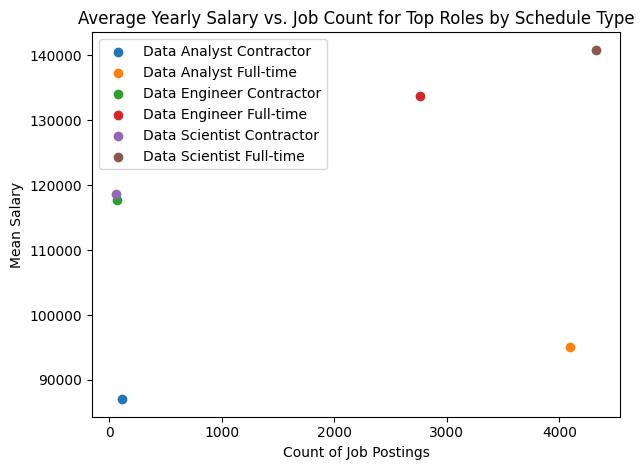

In [52]:
df_scatter = df_filtered.groupby('job_title_type').agg(
    job_count=('job_country', 'size'),
    job_mean_salary=('salary_year_avg', 'mean')
)
df_scatter.sort_values(by='job_count', ascending=False)

for i in range(len(df_scatter)):
    count = df_scatter['job_count'].iloc[i]
    salary = df_scatter['job_mean_salary'].iloc[i]
    name = df_scatter.index[i]
    plt.scatter(count, salary, label=name)

plt.ylabel('Mean Salary')
plt.xlabel('Count of Job Postings')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend().set_visible(True)
plt.tight_layout()
plt.show()